In [40]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [41]:
#%reset
from rocketpy import *

Env = Environment(
    railLength=1.0, latitude=-37.8, longitude=145, elevation=63
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

#### Motor Setup


Motor Details
Total Burning Time: 1.65 s
Total Propellant Mass: 28.225 g
Propellant Exhaust Velocity: 596.607 m/s
Average Thrust: 10.206 N
Maximum Thrust: 29.73 N at 0.282 s after ignition.
Total Impulse: 16.839 Ns

Plots


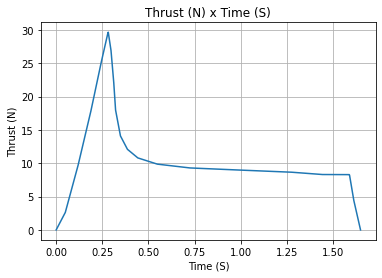

In [42]:

ESTESD12 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Estes_D12.eng",
    burnOut=1.7,
    grainNumber=1,
    grainDensity=1815,
    grainOuterRadius=18 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=50 / 1000,
)

ESTESD12.info()


#### Rocket Setup

Inertia Details
Rocket Mass: 280.000 g (No Propellant)
Rocket Mass: 308.225 g (With Propellant)

Geometrical Parameters
Rocket Diameter: 44.0 mm
Rocket fin to cm: 271.0 mm
Rocket cm to nose: 380.0 mm
Rocket Length: 651.0 mm

Aerodynamics Stability
Cp:-100.942 mm
Cg (loaded): 17.307 mm
Initial Static Margin: 2.687 c
Final Static Margin: 2.294 c

Aerodynamics Plots


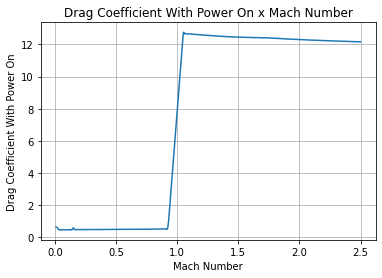

In [43]:
SUBSCALE = Rocket(
    motor=ESTESD12,
    radius=0.022,
    mass=0.280,
    inertiaI=0.01563, #0.004590,
    inertiaZ=0.0003438,
    distanceRocketNozzle=18.9/100 + 3.5/100,
    distanceRocketPropellant=18.9/100,
    elevation=Env.elevation,
    powerOffDrag="data/proxima/subscale_fin_OFF.csv",
    powerOnDrag="data/proxima/subscale_fin_ON.csv",
    # powerOffDrag="data/proxima/subscale_finless_OFF.csv",
    # powerOnDrag="data/proxima/subscale_finless_ON.csv",
)

SUBSCALE.setRailButtons([0.01, -0.028])

NoseCone = SUBSCALE.addNose(length=23/100, kind="OGIVE", distanceToCM=150/1000)


Canards = SUBSCALE.addFins(
    4, span=3.5/100, rootChord=4/100, tipChord=2/100, distanceToCM=5/1000, cantAngle=45
)

FinSet = SUBSCALE.addFins(
    4, span=5/100, rootChord=8/100, tipChord=3/100, distanceToCM=-19.1/100
)


SUBSCALE.info()

#### Flight Data

Apogee----------------
Apogee Altitude: 828.625 m (ASL) | 106.625 m (AGL)
Apogee Time: 5.372 s
Apogee Freestream Speed: 9.524 m/s

Events----------------
No Parachute Events Were Triggered.

Impact----------------
X Impact: 51.221 m
Y Impact: 32.205 m
Time of Impact: 10.166 s
Velocity at Impact: -42.287 m/s

Maximum Values----------------
Maximum Speed: 42.633 m/s at 10.17 s
Maximum Mach Number: 0.125 Mach at 10.17 s
Maximum Reynolds Number: 1.168e+05 at 10.17 s
Maximum Dynamic Pressure: 1.029e+03 Pa at 10.17 s
Maximum Acceleration: 88.053 m/s² at 0.28 s
Maximum Gs: 8.979 g at 0.28 s
Maximum Upper Rail Button Normal Force: 1.043 N
Maximum Upper Rail Button Shear Force: 0.286 N
Maximum Lower Rail Button Normal Force: 0.286 N
Maximum Lower Rail Button Shear Force: 2.701 N

BurnOut State----------------
BurnOut time: 1.650 s
Altitude at burnOut: 37.631 m (AGL)
Rocket velocity at burnOut: 39.531 m/s
Freestream velocity at burnOut: 40.182 m/s
Mach Number at burnOut: 0.117
Kinetic energy at 

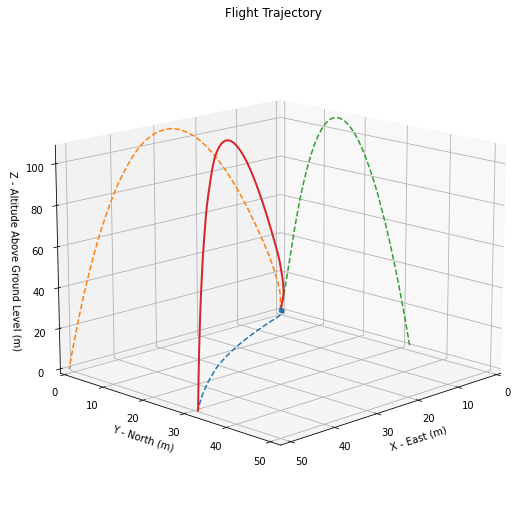



Fin Data



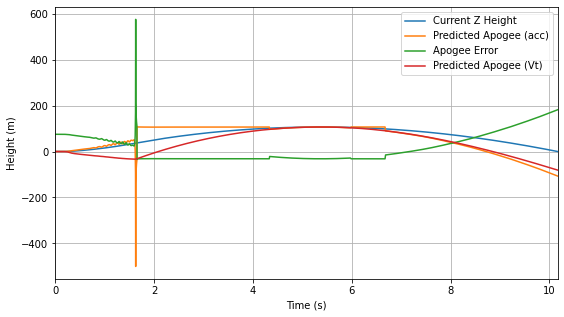

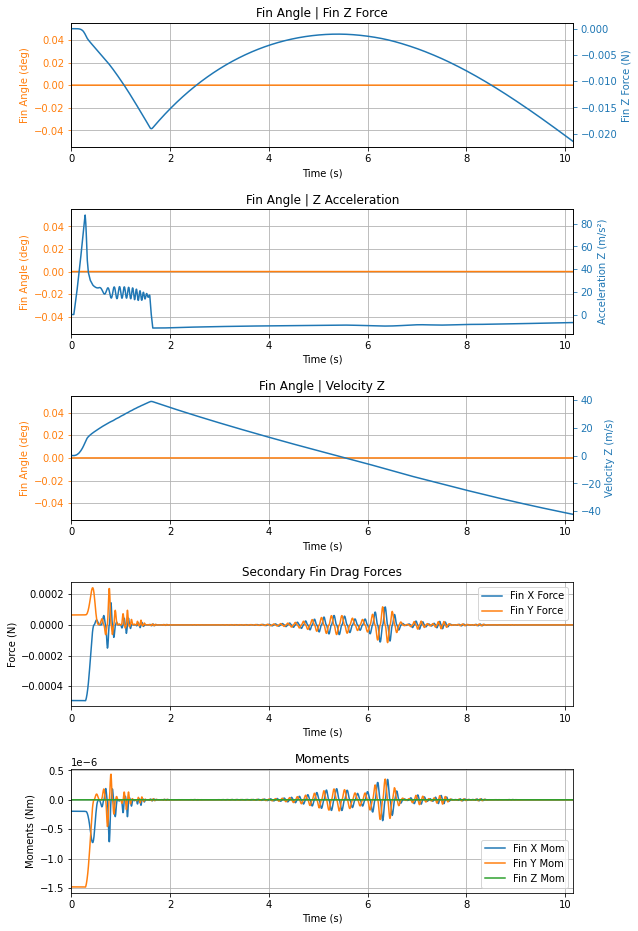

Initial Conditions----------------
Position - x: 0.00 m | y: 0.00 m | z: 722.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Trajectory Force Plots



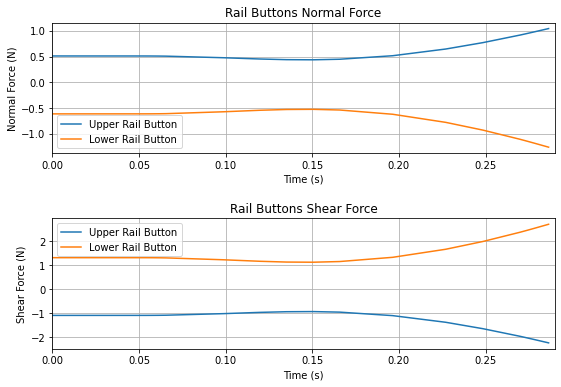

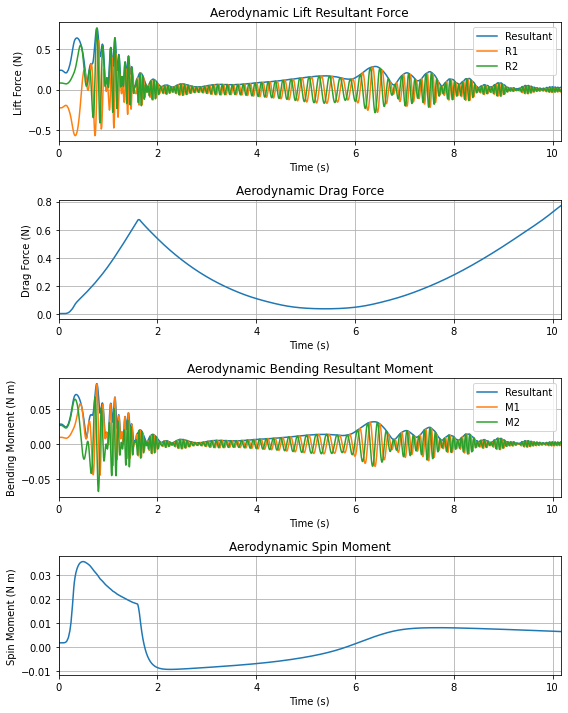



Trajectory Kinematic Plots



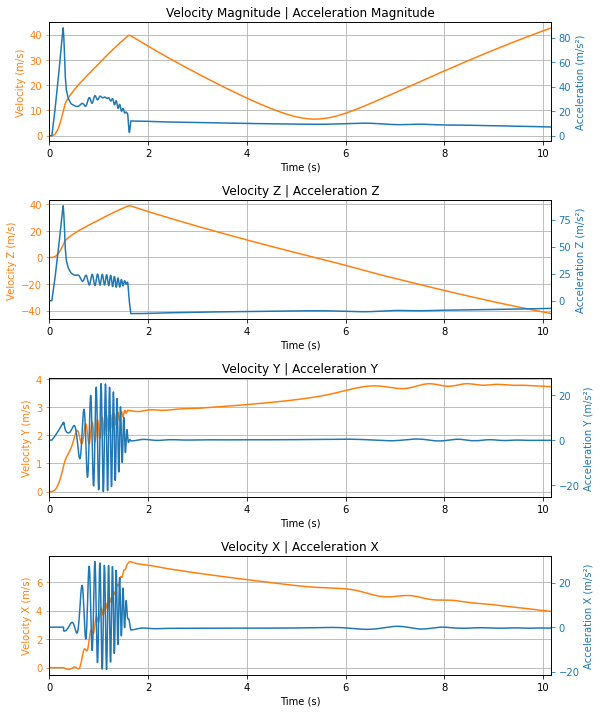



Angular Position Plots



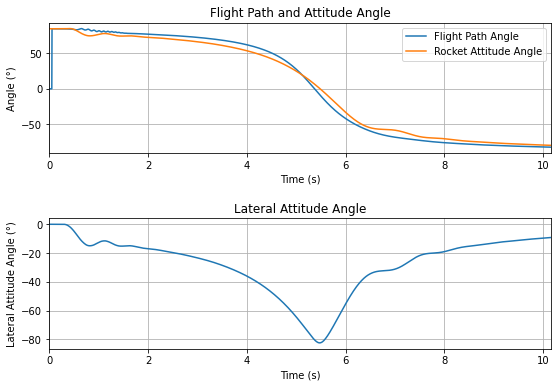



Path, Attitude and Lateral Attitude Angle plots



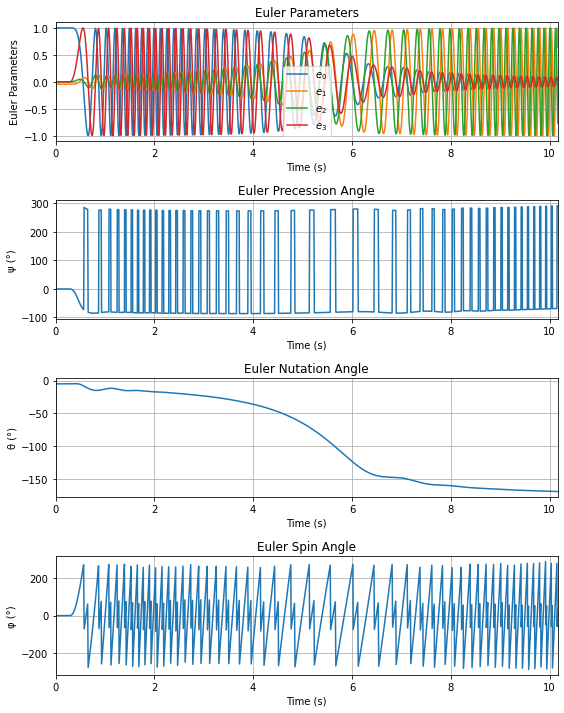



Trajectory Angular Velocity and Acceleration Plots



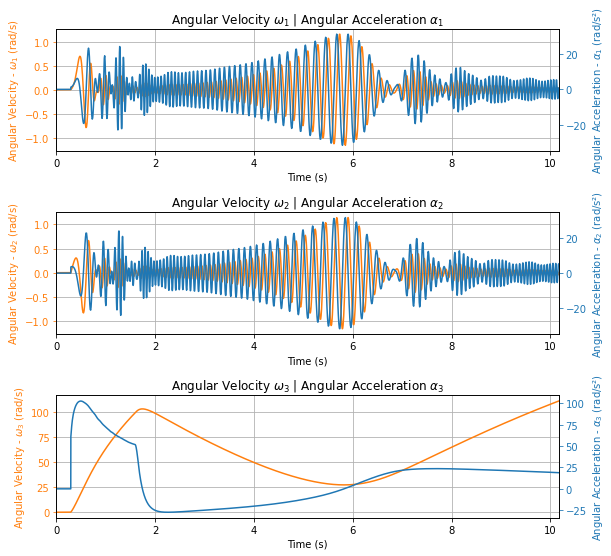



Trajectory Fluid Mechanics Plots



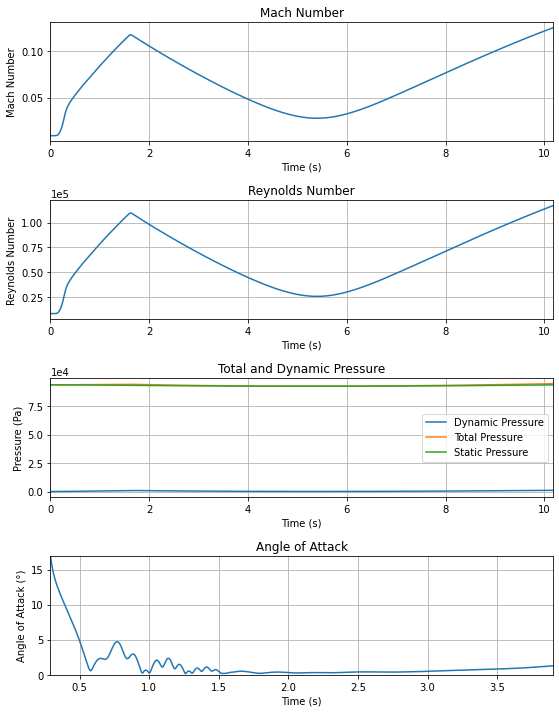



Trajectory Stability and Control Plots



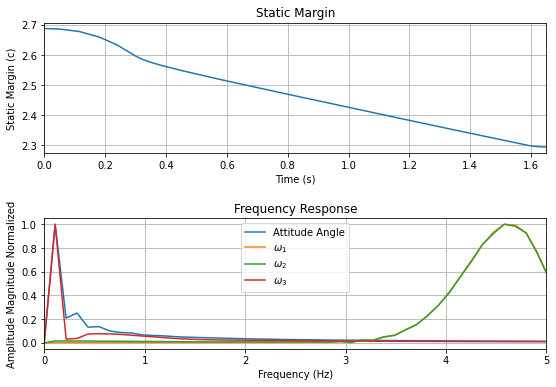



Trajectory Energy Plots



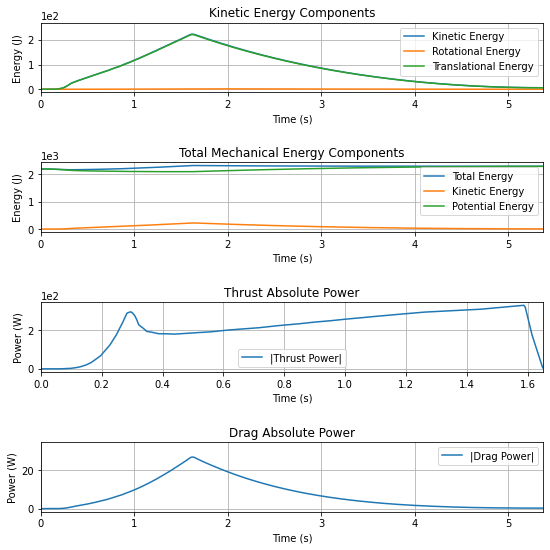


Launch Rail Orientation----------------
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°

Numerical Integration Information----------------
Maximum Allowed Flight Time: 600.000000 s
Maximum Allowed Time Step: inf s
Minimum Allowed Time Step: 0.000000e+00 s
Relative Error Tolerance:  1e-06
Absolute Error Tolerance:  [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 1e-06, 1e-06, 1e-06, 1e-06, 0.001, 0.001, 0.001]
Allow Event Overshoot:  True
Terminate Simulation on Apogee:  False
Number of Time Steps Used:  1743
Number of Derivative Functions Evaluation:  3526
Average Function Evaluations per Time Step: 2.022949


In [44]:
TestFlight = Flight(rocket=SUBSCALE, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()